# Introduction

---

This notebook focuses on analyzing Sustainable Development Goal (SDG) Indicator 4.c.1, which measures the Proportion of teachers with the minimum required qualifications, by education level.


Author: <br>
Jeremya Dharmawan Raharjo<br>


In [1]:
import pandas as pd

In [2]:
data_4c1 = pd.read_excel("../datasets/4.c.xlsx")


## 1. Data Overview

In [3]:
data_4c1.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Education level,Nature,Reporting Type,Sex,Units
0,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers with the minimum requir...,8,Albania,2018,59.39298,2018,...,NaN,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,C,G,FEMALE,PERCENT
1,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers with the minimum requir...,8,Albania,2018,49.04714,2018,...,NaN,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,C,G,MALE,PERCENT
2,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers with the minimum requir...,8,Albania,2018,55.97000,2018,...,NaN,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,C,G,BOTHSEX,PERCENT
3,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers with the minimum requir...,8,Albania,2020,51.32635,2020,...,NaN,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,C,G,BOTHSEX,PERCENT
4,4,4.c,4.c.1,SE_TRA_GRDL,Proportion of teachers with the minimum requir...,8,Albania,2020,54.16667,2020,...,NaN,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,UPPSEC,C,G,BOTHSEX,PERCENT


In [4]:
# data length
print(len(data_4c1))

8839


In [5]:
#filter by GeoAreaName Indonesia
data_4c1_indonesia = data_4c1[data_4c1["GeoAreaName"] == "Indonesia"]
print(f"Size of data_4c1_indonesia: {len(data_4c1_indonesia)}, contribute {data_4c1_indonesia.shape[0]/data_4c1.shape[0]*100:.2f}% of data_4c1")

Size of data_4c1_indonesia: 9, contribute 0.10% of data_4c1


In [6]:
# each column description and data type
data_4c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Goal               8839 non-null   int64  
 1   Target             8839 non-null   object 
 2   Indicator          8839 non-null   object 
 3   SeriesCode         8839 non-null   object 
 4   SeriesDescription  8839 non-null   object 
 5   GeoAreaCode        8839 non-null   int64  
 6   GeoAreaName        8839 non-null   object 
 7   TimePeriod         8839 non-null   int64  
 8   Value              8839 non-null   float64
 9   Time_Detail        8839 non-null   int64  
 10  TimeCoverage       0 non-null      float64
 11  UpperBound         0 non-null      float64
 12  LowerBound         0 non-null      float64
 13  BasePeriod         0 non-null      float64
 14  Source             8839 non-null   object 
 15  GeoInfoUrl         0 non-null      float64
 16  FootNote           91 no

### Analisis MetaData

In [7]:
# check how many unique values of each column
for col in data_4c1.columns:
    print(f"{col}: {len(data_4c1[col].unique())}")

Goal: 1
Target: 1
Indicator: 1
SeriesCode: 1
SeriesDescription: 1
GeoAreaCode: 78
GeoAreaName: 78
TimePeriod: 22
Value: 4591
Time_Detail: 22
TimeCoverage: 1
UpperBound: 1
LowerBound: 1
BasePeriod: 1
Source: 42
GeoInfoUrl: 1
FootNote: 3
Education level: 5
Nature: 2
Reporting Type: 1
Sex: 3
Units: 1


Analisis kolom yang bernilai uniform:

- Goal, Target, dan Indicator sifatnya uniform
- Series Code merupakan kode SDG saja
- Series Description bernilai "Proportion of teachers with the minimum required qualifications, by education level"
- TimeCoverage, UpperBound, LowerBound, BasePeriod, GeoInfoURL hanya kolom yang nilainya NULL
- ReportingType kolom dengan nilai Uniform, 'G' 
- Units merupakan kolom dengan nilai Uniform juga, 'PERCENT' (menunjukan kolom Value dalam persen)


## 2. Data Cleaning

In [8]:
# check for missing values
data_4c1.isnull().sum()

Goal                    0
Target                  0
Indicator               0
SeriesCode              0
SeriesDescription       0
GeoAreaCode             0
GeoAreaName             0
TimePeriod              0
Value                   0
Time_Detail             0
TimeCoverage         8839
UpperBound           8839
LowerBound           8839
BasePeriod           8839
Source                  0
GeoInfoUrl           8839
FootNote             8748
Education level         0
Nature                  0
Reporting Type          0
Sex                     0
Units                   0
dtype: int64

Menarik, mari inspeksi footnote untuk non-null valuenya

In [9]:
# check FootNote column
data_4c1["FootNote"].unique()

array([nan,
       'This data point is NOT APPLICABLE for the submitting nation.',
       'This data point is NIL for the submitting nation.'], dtype=object)

Berdasarkan analisis kolom uniform di atas, kita dapat drop kolom irelevan

In [10]:
# drop irrelevant columns
irrelevant_columns = ["Goal", "Target", "Indicator", "SeriesCode","SeriesDescription" , "TimeCoverage", "UpperBound", "LowerBound", "BasePeriod", "GeoInfoUrl", "FootNote", "Reporting Type", "Units"]

In [11]:
# print each unique value of each irrelevant column
for col in irrelevant_columns:
    print(f"{col}: {data_4c1[col].unique()}")

Goal: [4]
Target: ['4.c']
Indicator: ['4.c.1']
SeriesCode: ['SE_TRA_GRDL']
SeriesDescription: ['Proportion of teachers with the minimum required qualifications, by education level and sex (%)']
TimeCoverage: [nan]
UpperBound: [nan]
LowerBound: [nan]
BasePeriod: [nan]
GeoInfoUrl: [nan]
FootNote: [nan 'This data point is NOT APPLICABLE for the submitting nation.'
 'This data point is NIL for the submitting nation.']
Reporting Type: ['G']
Units: ['PERCENT']


In [12]:
# new data without irrelevant columns
data_4c1_cleaned = data_4c1.drop(columns=irrelevant_columns)
data_4c1_cleaned.head()

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,Education level,Nature,Sex
0,8,Albania,2018,59.39298,2018,UNESCO Institute for Statistics. Data extract...,LOWSEC,C,FEMALE
1,8,Albania,2018,49.04714,2018,UNESCO Institute for Statistics. Data extract...,LOWSEC,C,MALE
2,8,Albania,2018,55.97000,2018,UNESCO Institute for Statistics. Data extract...,LOWSEC,C,BOTHSEX
3,8,Albania,2020,51.32635,2020,UNESCO Institute for Statistics. Data extract...,LOWSEC,C,BOTHSEX
4,8,Albania,2020,54.16667,2020,UNESCO Institute for Statistics. Data extract...,UPPSEC,C,BOTHSEX


## 3. Univariate Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# define method to plot bar chart for column distribution
def plot_bar_chart(data, column, title, _figsize=(10,5)):
    plt.figure(figsize=_figsize)
    sns.countplot(data[column])
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

In [15]:
def hist_plot(data, column, title, _figsize=(10,5)):
    plt.figure(figsize=_figsize)
    sns.histplot(data[column])
    plt.title(title)
    plt.show()

### Distribution of GeoAreaCode

In [16]:
geoarecode = data_4c1_cleaned["GeoAreaCode"]
geoarecode.value_counts()

GeoAreaCode
446    315
275    270
724    267
410    267
192    259
      ... 
643     13
703     10
360      9
858      9
710      7
Name: count, Length: 78, dtype: int64

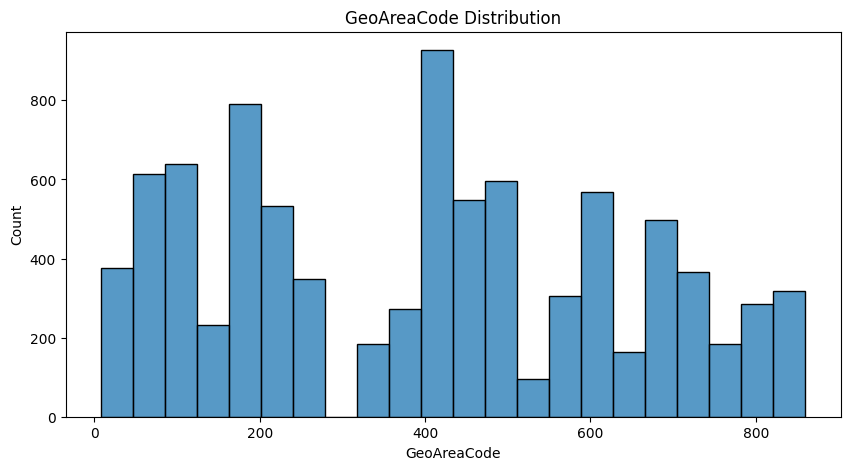

In [17]:
hist_plot(data_4c1_cleaned, "GeoAreaCode", "GeoAreaCode Distribution")

### GeoAreaName

In [18]:
# histogram for GEOAreaName
geoarename = data_4c1_cleaned["GeoAreaName"]
geoarename.value_counts()

GeoAreaName
China, Macao Special Administrative Region    315
State of Palestine                            270
Spain                                         267
Republic of Korea                             267
Cuba                                          259
                                             ... 
Russian Federation                             13
Slovakia                                       10
Indonesia                                       9
Uruguay                                         9
South Africa                                    7
Name: count, Length: 78, dtype: int64

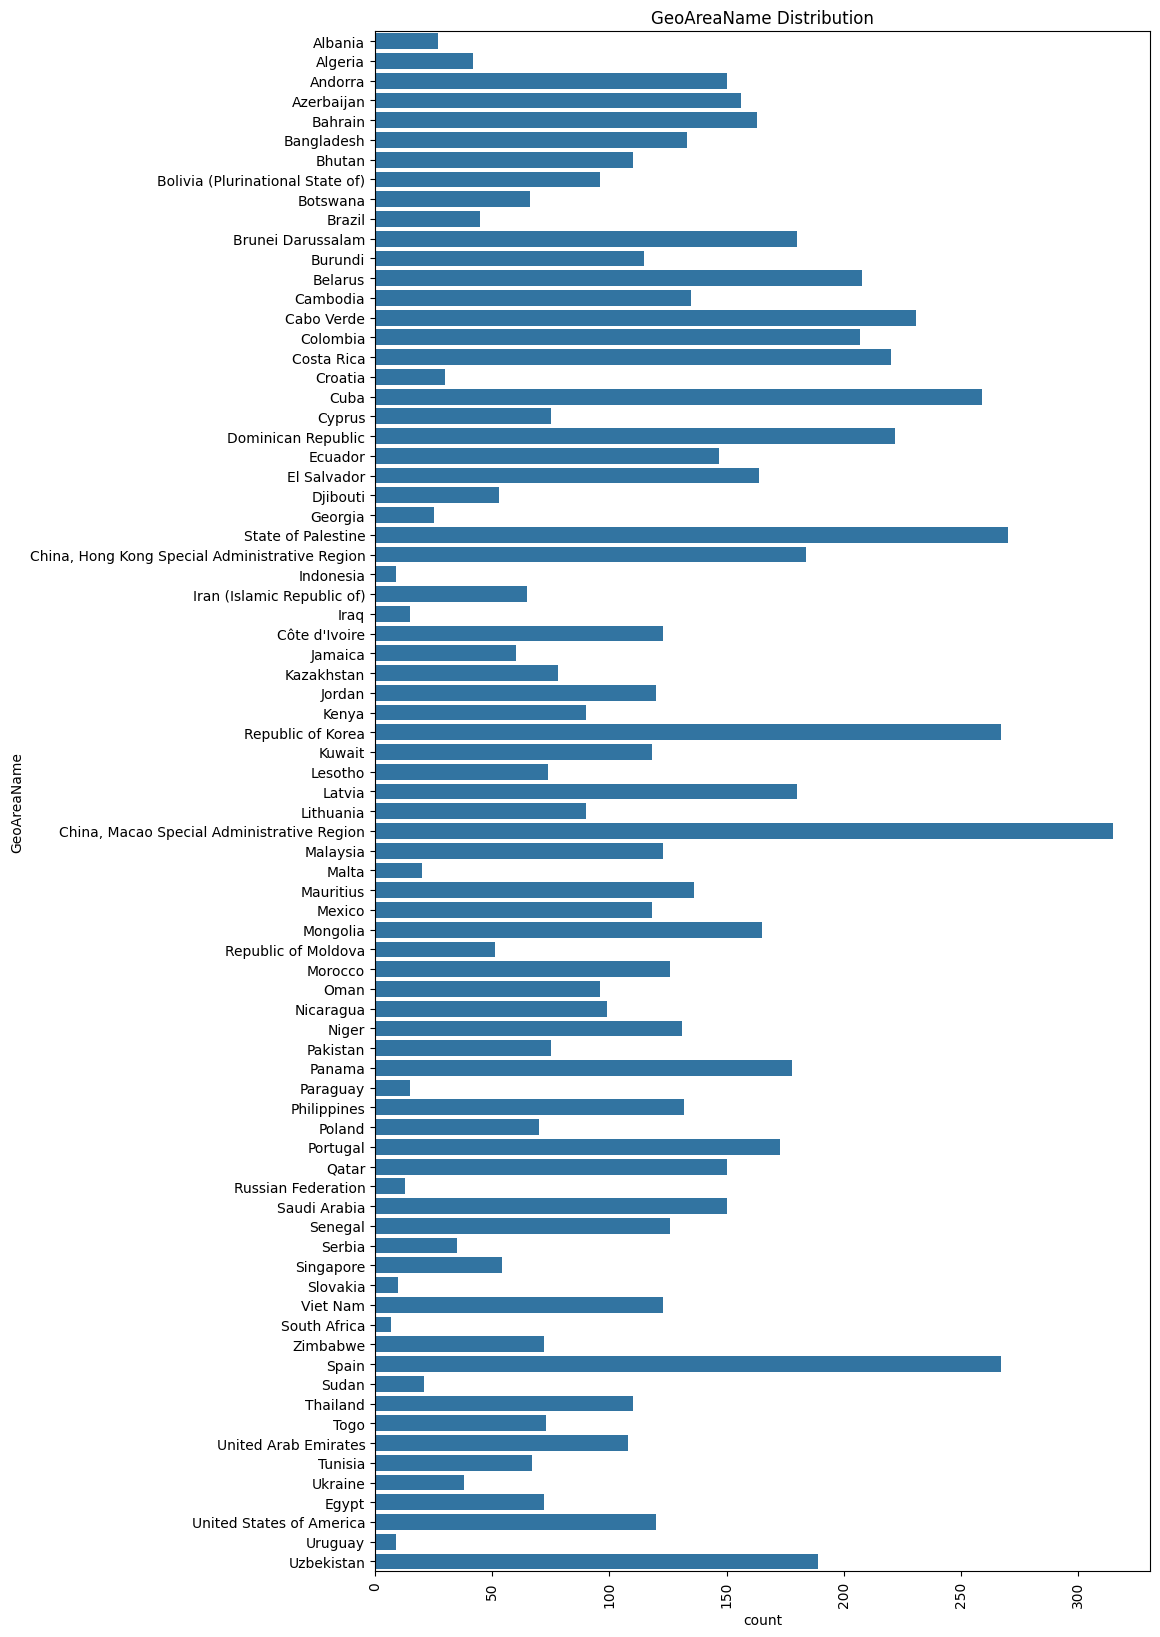

In [19]:
# make histogram for data distribution of geoarename
plot_bar_chart(data_4c1_cleaned, "GeoAreaName", "GeoAreaName Distribution", _figsize=(10,20))

In [20]:
# top 10 GeoAreaName
geoarename.value_counts().head(10)

GeoAreaName
China, Macao Special Administrative Region    315
State of Palestine                            270
Spain                                         267
Republic of Korea                             267
Cuba                                          259
Cabo Verde                                    231
Dominican Republic                            222
Costa Rica                                    220
Belarus                                       208
Colombia                                      207
Name: count, dtype: int64

In [21]:
# Get Indonesian Data
data_4c1_indonesia = data_4c1_cleaned[data_4c1_cleaned["GeoAreaName"] == "Indonesia"]
data_4c1_indonesia

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,Education level,Nature,Sex
3713,360,Indonesia,2022,39.745,2022,Source: Country submission () Data extracted o...,LOWSEC,C,BOTHSEX
3714,360,Indonesia,2022,38.305,2022,Source: Country submission () Data extracted o...,SECOND,C,BOTHSEX
3715,360,Indonesia,2022,39.194,2022,Source: Country submission () Data extracted o...,LOWSEC,C,MALE
3716,360,Indonesia,2022,40.064,2022,Source: Country submission () Data extracted o...,LOWSEC,C,FEMALE
3717,360,Indonesia,2022,35.563,2022,Source: Country submission () Data extracted o...,UPPSEC,C,FEMALE
3718,360,Indonesia,2022,37.956,2022,Source: Country submission () Data extracted o...,SECOND,C,FEMALE
3719,360,Indonesia,2022,36.823,2022,Source: Country submission () Data extracted o...,UPPSEC,C,BOTHSEX
3720,360,Indonesia,2022,38.838,2022,Source: Country submission () Data extracted o...,SECOND,C,MALE
3721,360,Indonesia,2022,38.522,2022,Source: Country submission () Data extracted o...,UPPSEC,C,MALE


In [22]:
# Get China Data
data_4c1_china = data_4c1_cleaned[data_4c1_cleaned["GeoAreaName"] == "China, Macao Special Administrative Region"]
data_4c1_china

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,Education level,Nature,Sex
5002,446,"China, Macao Special Administrative Region",2002,0.00000,2002,UNESCO Institute for Statistics. Data extract...,PREPRI,C,MALE
5003,446,"China, Macao Special Administrative Region",2002,91.51599,2002,UNESCO Institute for Statistics. Data extract...,PRIMAR,C,FEMALE
5004,446,"China, Macao Special Administrative Region",2002,61.63462,2002,UNESCO Institute for Statistics. Data extract...,LOWSEC,C,BOTHSEX
5005,446,"China, Macao Special Administrative Region",2002,70.79511,2002,UNESCO Institute for Statistics. Data extract...,LOWSEC,C,FEMALE
5006,446,"China, Macao Special Administrative Region",2002,89.66584,2002,UNESCO Institute for Statistics. Data extract...,PRIMAR,C,BOTHSEX
...,...,...,...,...,...,...,...,...,...
5312,446,"China, Macao Special Administrative Region",2022,93.23362,2022,UNESCO Institute for Statistics. Data extract...,UPPSEC,C,BOTHSEX
5313,446,"China, Macao Special Administrative Region",2022,92.12219,2022,UNESCO Institute for Statistics. Data extract...,UPPSEC,C,MALE
5314,446,"China, Macao Special Administrative Region",2022,99.78182,2022,UNESCO Institute for Statistics. Data extract...,PREPRI,C,BOTHSEX
5315,446,"China, Macao Special Administrative Region",2022,94.11765,2022,UNESCO Institute for Statistics. Data extract...,UPPSEC,C,FEMALE


## TimePeriod

In [23]:
# Distribution of TimePeriod
data_4c1_cleaned["TimePeriod"].value_counts()


TimePeriod
2020    625
2019    618
2021    585
2018    576
2017    555
2016    529
2015    514
2014    471
2022    422
2007    387
2013    374
2012    372
2011    365
2008    361
2009    341
2006    317
2010    311
2004    306
2005    299
2002    228
2003    226
2023     57
Name: count, dtype: int64

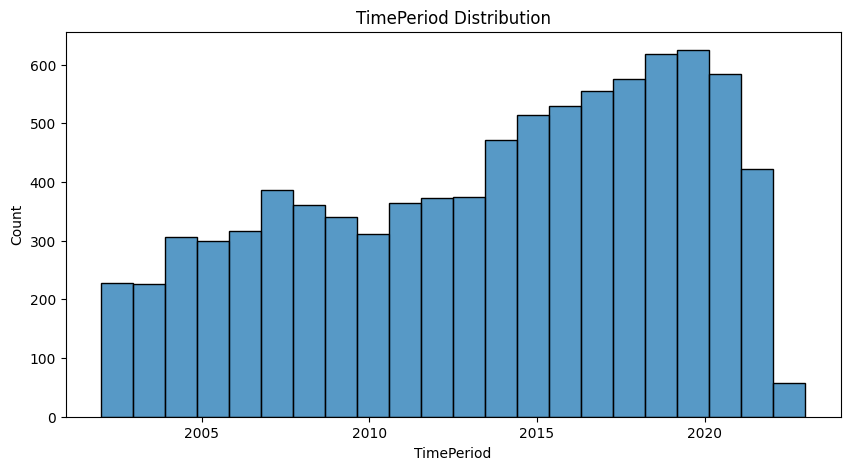

In [24]:
hist_plot(data_4c1_cleaned, "TimePeriod", "TimePeriod Distribution")

Data terbanyak pada tahun 2020

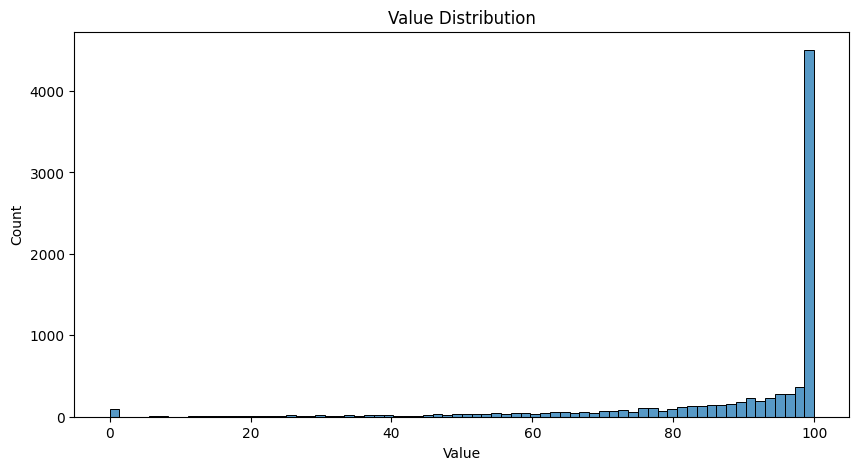

In [25]:
#plot the distribution of column "Value" using histogram and boxplot
hist_plot(data_4c1_cleaned, "Value", "Value Distribution")

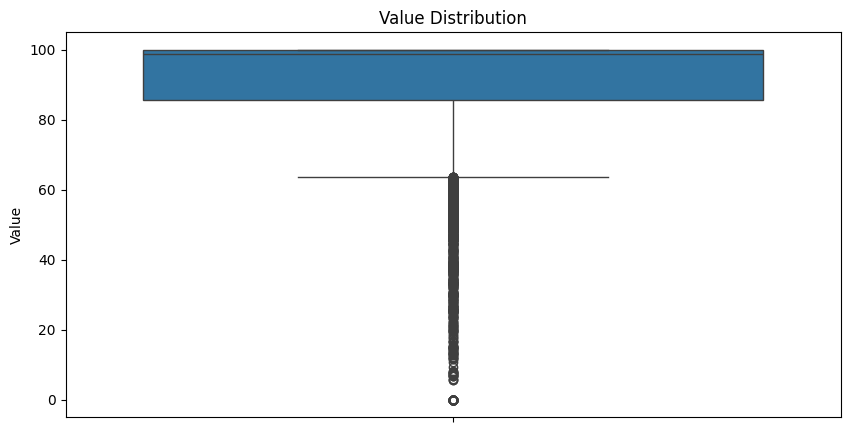

In [26]:
# boxplot for Value
plt.figure(figsize=(10,5))
sns.boxplot(data_4c1_cleaned["Value"])
plt.title("Value Distribution")
plt.show()

In [27]:
# check for statistical description of Value
data_4c1_cleaned["Value"].describe()


count    8839.000000
mean       88.978965
std        19.000994
min         0.000000
25%        85.482540
50%        98.888890
75%       100.000000
max       100.000000
Name: Value, dtype: float64

In [28]:
#check lower bound and upper bound of IQR
Q1 = data_4c1_cleaned["Value"].quantile(0.25)
Q3 = data_4c1_cleaned["Value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 63.70635, Upper Bound: 121.77619


## Time Detail

In [30]:
# check TimeDetail column
data_4c1_cleaned["Time_Detail"].unique()

array([2018, 2020, 2021, 2002, 2003, 2004, 2005, 2006, 2007, 2014, 2015,
       2022, 2023, 2008, 2009, 2010, 2011, 2012, 2013, 2016, 2017, 2019])

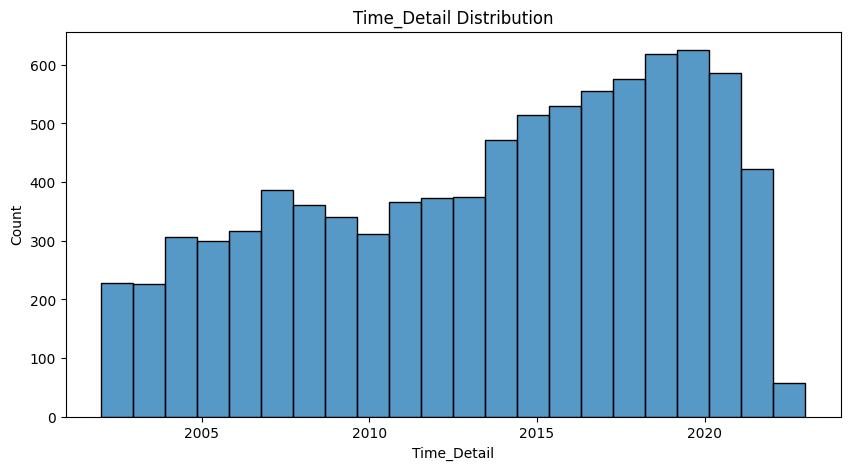

In [31]:
# histplot
hist_plot(data_4c1_cleaned, "Time_Detail", "Time_Detail Distribution")

In [33]:
# check if Time_Detail and TimePeriod have the same value
bool_series = data_4c1_cleaned["Time_Detail"] == data_4c1_cleaned["TimePeriod"]
#if the length of the unique value is 1, then the two columns have the same value
if(len(bool_series.unique()) == 1):
    print("Time_Detail and TimePeriod have the same value")

Time_Detail and TimePeriod have the same value


## Source column

In [34]:
#analyze Source column
data_4c1_cleaned["Source"].unique()

array(['UNESCO Institute for Statistics.  Data extracted on 21 February 2024.',
       'UIS Dynamic Template with data from the UIS Education Survey Data extracted on 21 February 2024.',
       'Source: Country submission () Data extracted on 21 February 2024.',
       'Source: ANNUAL EDUCATION STATISTICS 2015 (http://www.education.gov.bt/index.php/publications/) Data extracted on 21 February 2024.',
       'Source: ANNUAL EDUCATION STATISTICS 2017 (http://www.education.gov.bt/index.php/publications/) Data extracted on 21 February 2024.',
       'Source: ANNUAL EDUCATION STATISTICS 2018 (http://www.education.gov.bt/index.php/publications/) Data extracted on 21 February 2024.',
       'Source: ANNUAL EDUCATION STATISTICS 2019 (http://www.education.gov.bt/index.php/publications/) Data extracted on 21 February 2024.',
       'Source: ANNUAL EDUCATION STATISTICS 2020 (http://www.education.gov.bt/index.php/publications/) Data extracted on 21 February 2024.',
       'Source: ANNUAL EDUCATION

In [35]:
print(f"Unique values of Source: {len(data_4c1_cleaned['Source'].unique())}")

Unique values of Source: 42


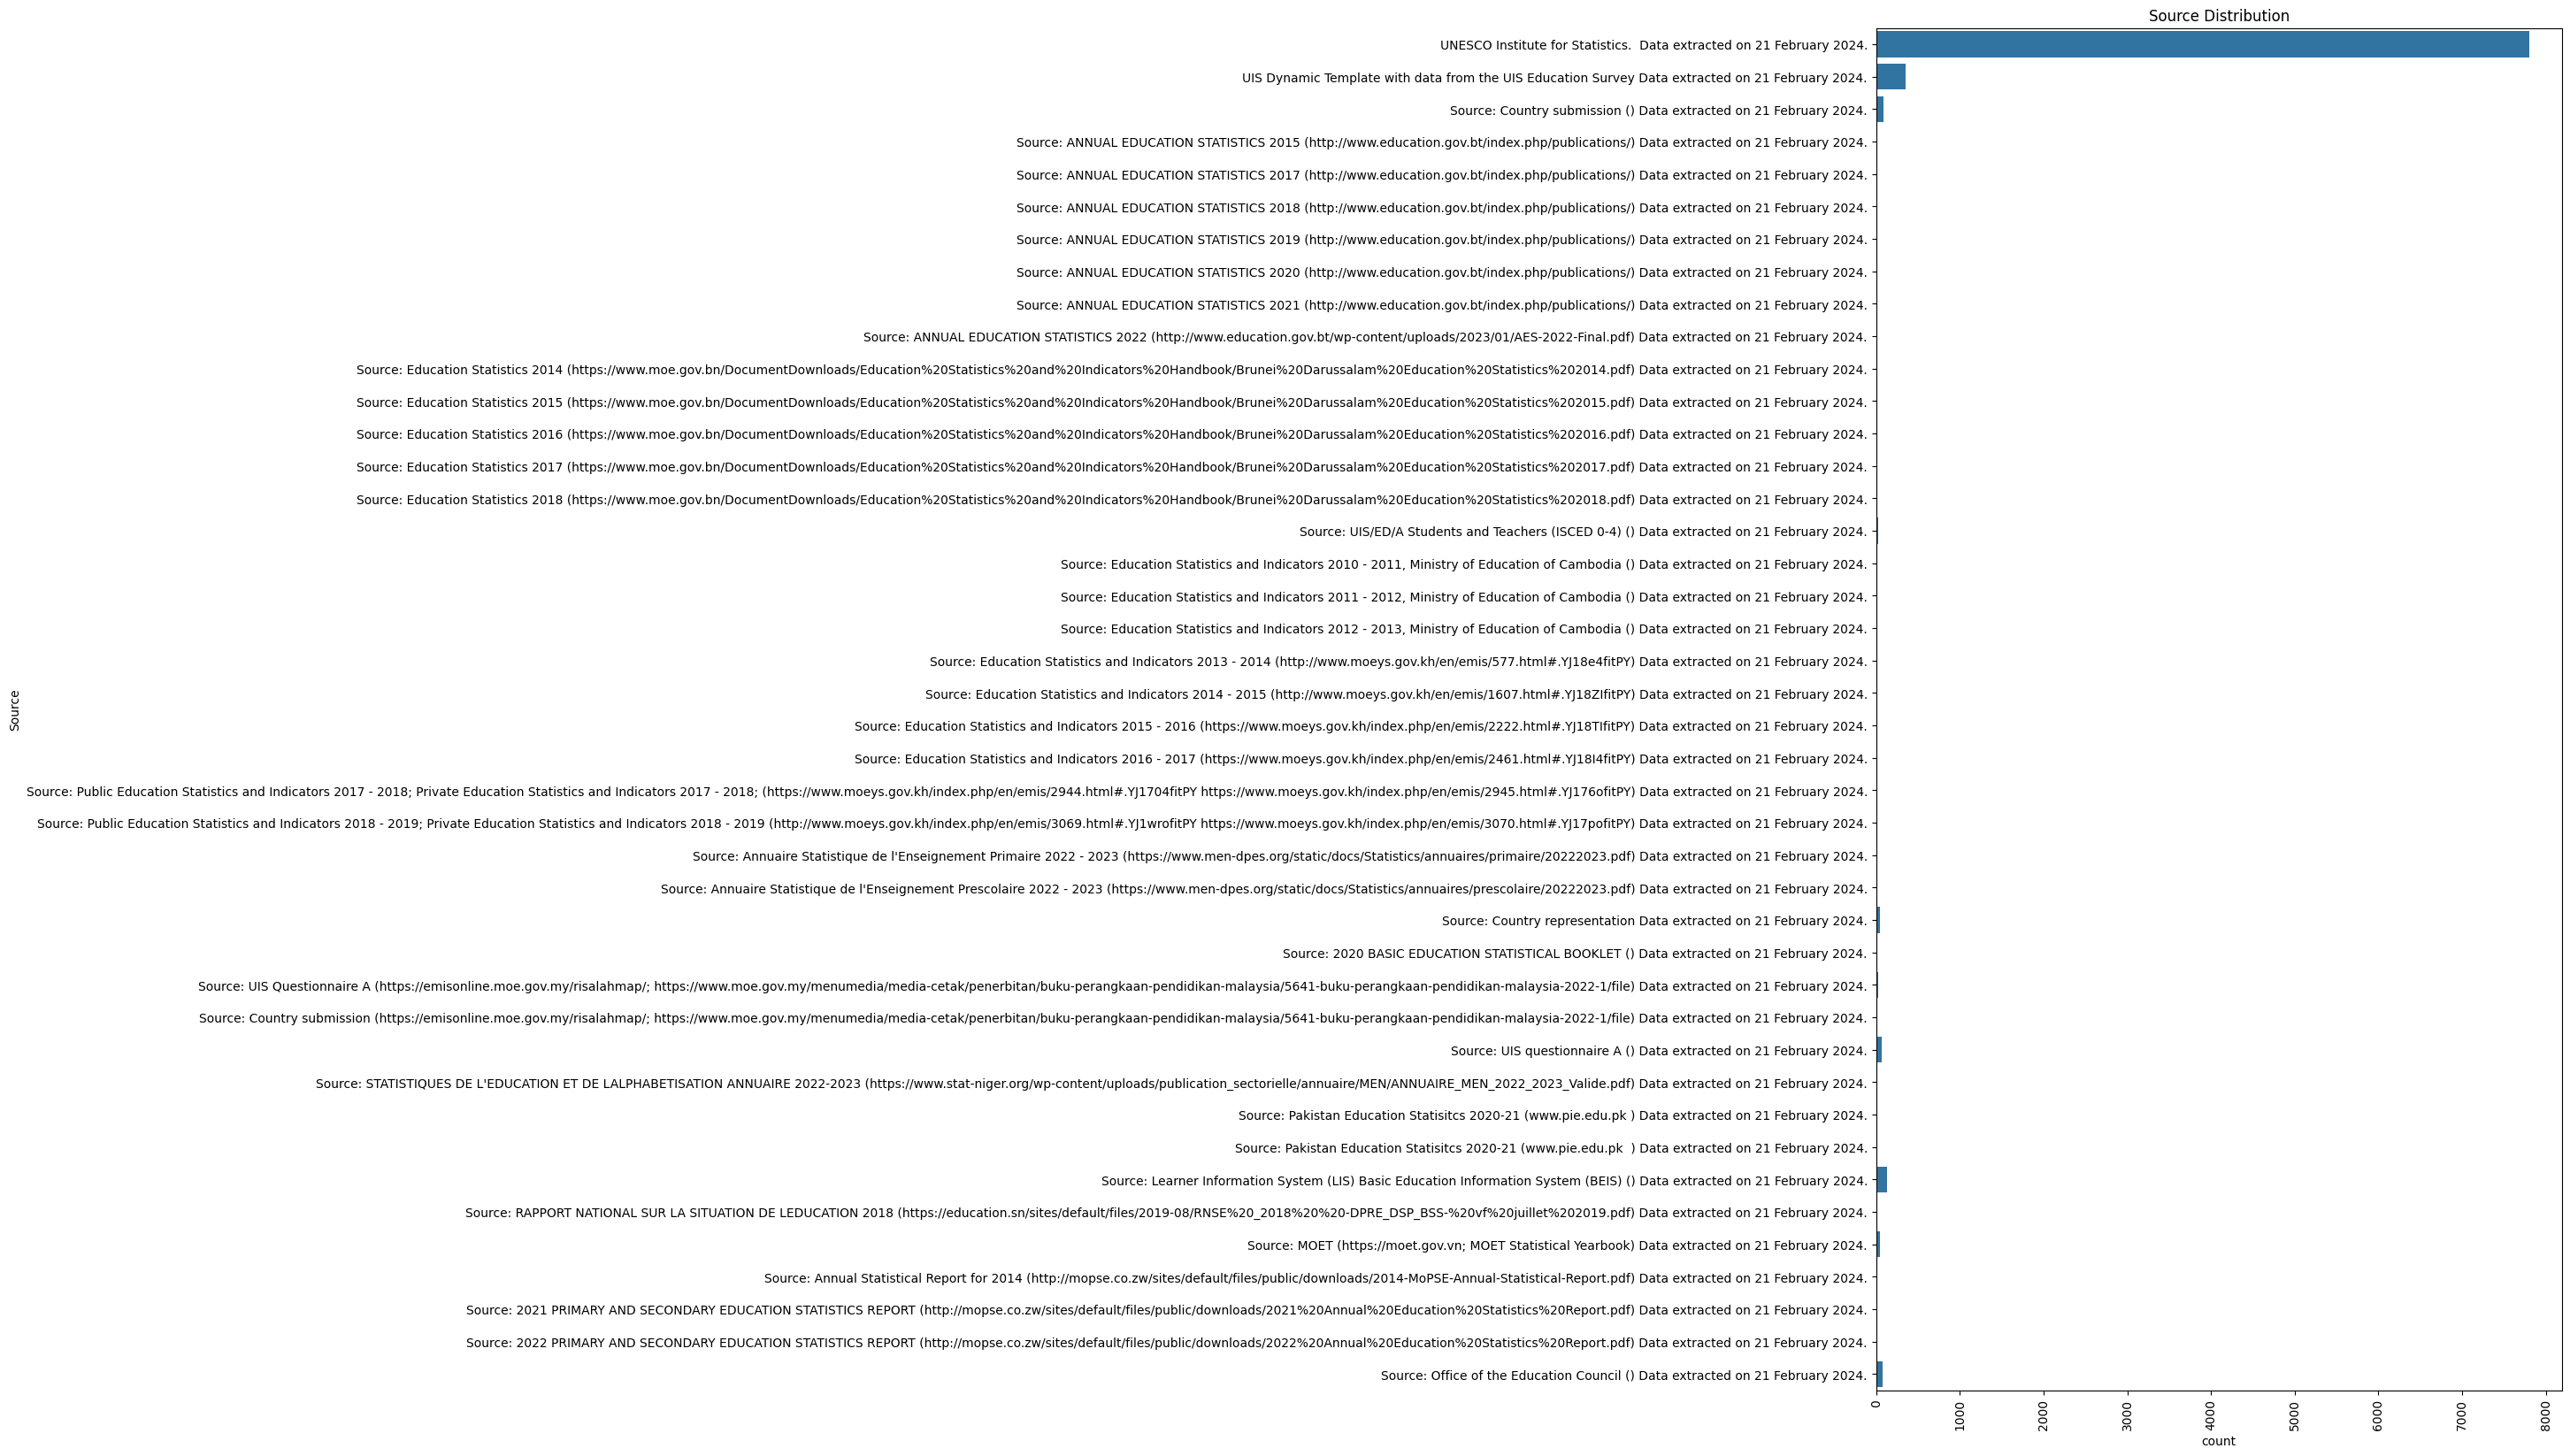

In [37]:
plot_bar_chart(data_4c1_cleaned, "Source", "Source Distribution", _figsize=(10,20))

Education level

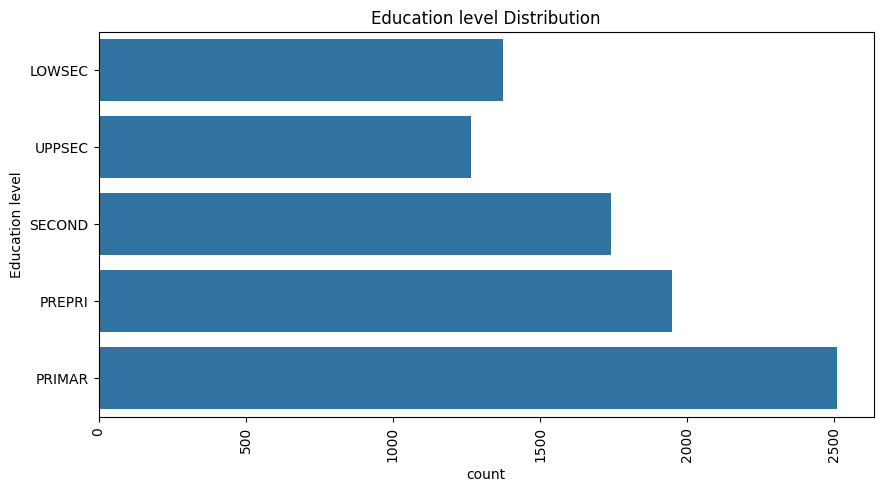

In [38]:
# plot "Education level" column
plot_bar_chart(data_4c1_cleaned, "Education level", "Education level Distribution")

## Nature column plot

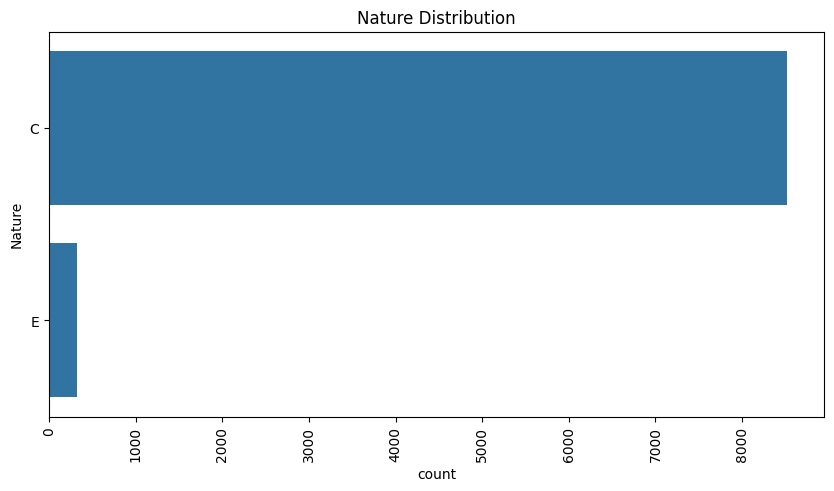

In [39]:
# plot "Nature" column
plot_bar_chart(data_4c1_cleaned, "Nature", "Nature Distribution")

## Sex column plot

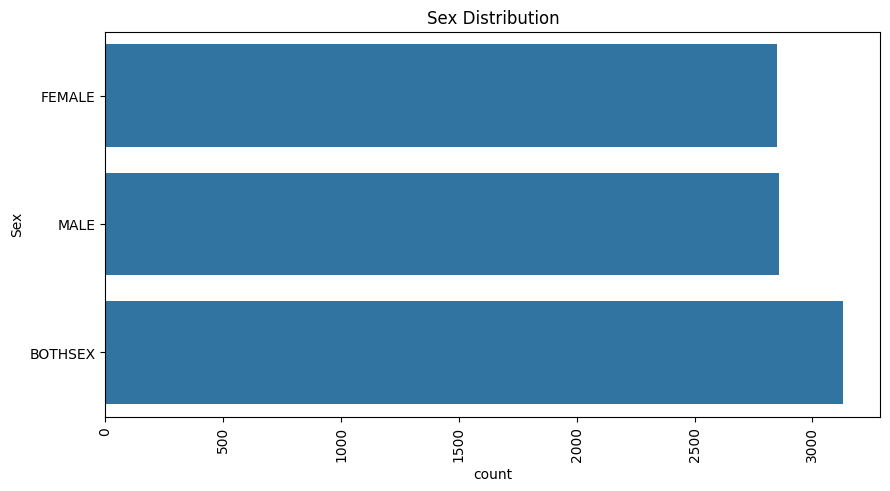

In [40]:
# plot "Sex" column

plot_bar_chart(data_4c1_cleaned, "Sex", "Sex Distribution")

## Multivariate Analysis

### Visualisasi Distribusi Visualisasi di Indonesia untuk kolom Value

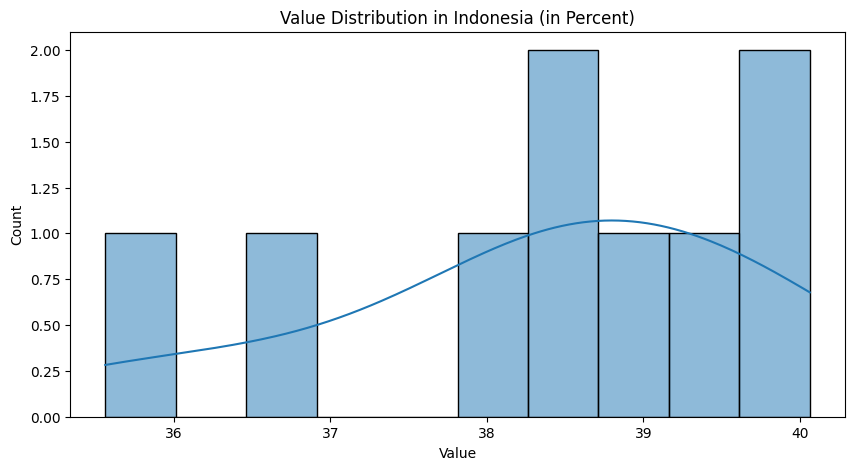

In [49]:
### Visualisasi Distribusi Visualisasi di Indonesia untuk kolom Value
## make the bar is thinner
## plot with including line of distribution
## bellow the code:
plt.figure(figsize=(10,5))
sns.histplot(data_4c1_indonesia["Value"], bins=10, kde=True)
plt.title("Value Distribution in Indonesia (in Percent)")
plt.show()


In [50]:
# descriptive statistics of Value in Indonesia
data_4c1_indonesia["Value"].describe()

count     9.000000
mean     38.334444
std       1.419422
min      35.563000
25%      37.956000
50%      38.522000
75%      39.194000
max      40.064000
Name: Value, dtype: float64

## Tingkat Pendidikan di Indonesia

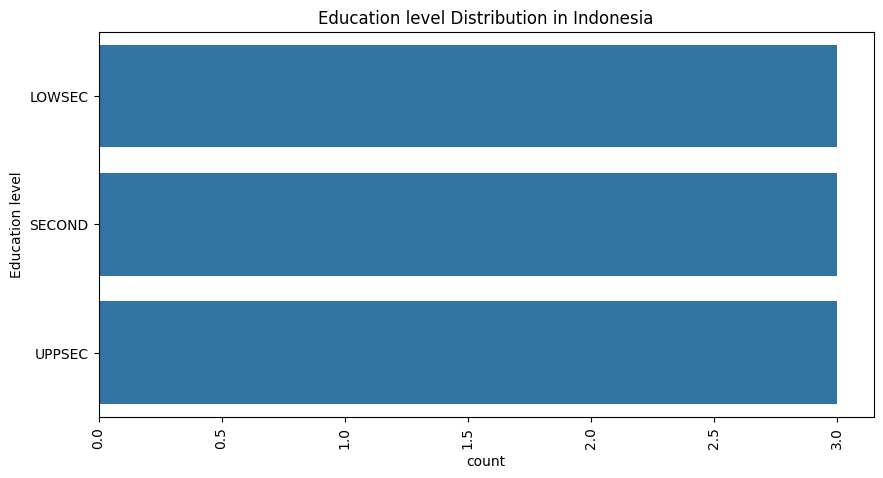

In [51]:
## Tingkat Pendidikan di Indonesia
## plot the distribution of Education level in Indonesia
plot_bar_chart(data_4c1_indonesia, "Education level", "Education level Distribution in Indonesia")